In [305]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy import integrate
import seaborn as sns
import matplotlib.pyplot as plt

from typing import Union

# Значения функций в scipy

## PDF

- **функция плотности вероятности (pdf - probability density function)** - возвращает значение функции плотности для конкретного значения непрерывной СВ.

Значение функции плотности вероятности для значения 0: 0.399
Значение функции плотности вероятности для значения 2: 0.054


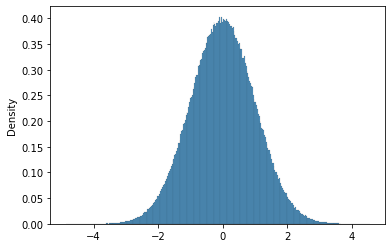

In [18]:
# к примеру для нормального распределения
sample = stats.norm.rvs(size=1000000)
print("Значение функции плотности вероятности для значения 0: {:.3f}".format(stats.norm.pdf(0)))
print("Значение функции плотности вероятности для значения 2: {:.3f}".format(stats.norm.pdf(2)))

sns.histplot(sample, stat="density");

Как мы видим, функция `pdf` фозвращает значение функции плотности для определенного значения случайной величины (непрерывной). Для дискретных СВ этой функции соответственно нет. По площади под функцией плотности на отрезке можно определить вероятность того, что СВ примет значение на этом отрезке.

И действительно по формуле:

$$
P (\xi \in [a, b]) = \int_a^b f(x) dx
$$

где

$f(x)$ - функция плотности вероятности

Построим график функции плотности на основании этого знания для нормального распределения.

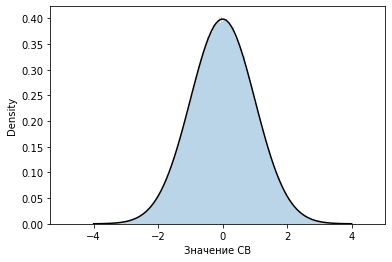

In [26]:
x = np.linspace(-4, 4, 100)
y = stats.norm.pdf(x)

ax = sns.histplot(sample, stat="density", lw=0, alpha=0.3)
sns.lineplot(x=x, y=y, c="black", ax=ax)
ax.set_xlabel(xlabel="Значение СВ");

## CDF

- **функция накопленной плотности (cdf - cumulative distribution function)** - соответствует $F(x)$ - функции распределения. Функция возвращает значение вероятности того, что СВ примет значение меньшее или равное определенному значению - $P(X \leq x)$. Актуально как для непрерывных, так и для дискретных распределений.

Опять же, для нормального распределения:

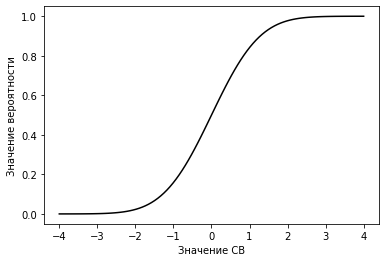

In [30]:
y = stats.norm.cdf(x)

ax = sns.lineplot(x=x, y=y, c="black")
ax.set_xlabel(xlabel="Значение СВ")
ax.set_ylabel(ylabel="Значение вероятности");

Для дискретного распределения аналогично непрерывному - вероятность $P(X \leq x)$. На примере биномиального распределения $\text{Bin}(n=5, p=0.4)$:

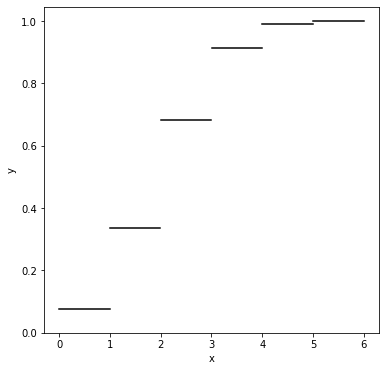

In [164]:
n = 5
p = 0.4

x = np.linspace(0, 6, 1000)
y = stats.binom.cdf(x, n, p)
df = pd.DataFrame(data={"x": x, "y": y})

groups = df.groupby("y")

fig, ax = plt.subplots(figsize=(6, 6))

for _, data in groups:
    sns.lineplot(data=data, x="x", y="y", ax=ax, c="black")
ax.set_ylim(bottom=0);

In [196]:
print("К примеру:\nВероятность того, что Х <= 1 равна:\t{:.2f}".format(stats.binom.cdf(1, n, p)))
print("Вероятность того, что Х <= 1.1 равна:\t{:.2f}".format(stats.binom.cdf(1.1, n, p)))
print("Вероятность того, что Х <= 0.9 равна:\t{:.2f}".format(stats.binom.cdf(0.9, n, p)))

К примеру:
Вероятность того, что Х <= 1 равна:	0.34
Вероятность того, что Х <= 1.1 равна:	0.34
Вероятность того, что Х <= 0.9 равна:	0.08


Что соответствует графику

## PPF

- **PPF (percent point function)** - функция, обратная функции `cdf`. Если `cdf` возвращает значение вероятности $P(X \leq x)$, то `ppf` - наоборот, возвращает возвращает значение СВ $X$, при котором $P(X \leq x)$ не превышает указанную в `ppf` вероятность. Даже в документации указано, что `ppf - inverse of cdf`.

В качестве примера возьмем, как и в предыдущем случае, биномиальное распределение $\text{Bin}(n=5, p=0.4)$. На графике выше, вероятность того, что $X \leq 1.9$ равна 

In [208]:
n, p = 5, 0.4
print("P(X <= 1.9) = {:.2f}".format(stats.binom.cdf(1.9, n, p)))

P(X <= 1.9) = 0.34


Соответственно, `ppf` для значения 0.33 вернет максимальное значение СВ $x$ из нашего распределения $\text{Bin}(n=5, p=0.4)$, при котором $P(X \leq x) < 0.33$ (т.е. не превышает). См. ниже.

In [209]:
n, p = 5, 0.4
stats.binom.ppf(0.33, n, p)

1.0

И дейтсвительно, для значения СВ $x = 2$, вероятность $P(X \leq 2)$ равна

In [203]:
print("{:.2f}".format(stats.binom.cdf(2, n, p)))

0.68


## PMF

- **pmf (probability mass function)** - функция, аналогичная `pdf` (probability density function - функция плотности вероятности), но для дискретных распределений. По факту, `pmf` возвращает вероятность  того, что СВ $X$ примет значение $x$, т.е. вероятность $P(X = x)$.

К примеру, для биномиального распределения $\text{Bin}(n=5, p=0.4)$:

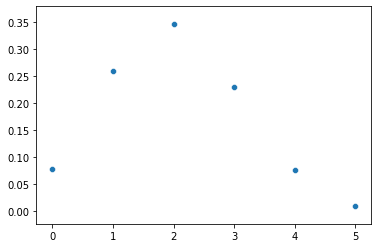

In [225]:
n, p = 5, 0.4

x = np.arange(n + 1)
y = stats.binom.pmf(x, n, p)
ax = sns.scatterplot(x=x, y=y);

In [230]:
print("Вероятность того, что СВ примет значение 0, равна:\t{:.2f}".format(stats.binom.pmf(0, n, p)))
print("Вероятность того, что СВ примет значение 2, равна:\t{:.2f}".format(stats.binom.pmf(2, n, p)))
print("Вероятность того, что СВ примет значение 5, равна:\t{:.2f}".format(stats.binom.pmf(5, n, p)))
print("Вероятность того, что СВ примет значение 3.1, равна:\t{:.2f}".format(stats.binom.pmf(3.1, n, p)))

Вероятность того, что СВ примет значение 0, равна:	0.08
Вероятность того, что СВ примет значение 2, равна:	0.35
Вероятность того, что СВ примет значение 5, равна:	0.01
Вероятность того, что СВ примет значение 3.1, равна:	0.00


# Дискретные распределения

## Распределение Бернули

Распределение Бернули, в котором СВ величина может принимать значения 0 или 1 с вероятностями $q$ и $p$ соответственно.

$$
Bin_{p, q}(x) = 
\begin{equation*}
\begin{cases}
q, x = 0 \\
p, x = 1
\end{cases}
\end{equation*}
$$

**Математическое ожидание**

$$
E \left[Bin_{p, q} \right] = p
$$

**Дисперсия**

$$
D \left[Bin_{p, q} \right] = pq = p(1 - p)
$$

In [251]:
p = 0.4
sample = stats.bernoulli.rvs(p=p, size=100000)

# математическое ожидание
print("Математическое ожидание: {:.2f}".format(sample.mean()))

Математическое ожидание: 0.40


Выведем основные моменты распределения

In [268]:
# расчет первых 4-х моментов распределения Бернули с p = 0.4:
mean, var, skew, kurt = stats.bernoulli.stats(p, moments="mvsk")

print("Mean:\t\t{}".format(mean))  # среднее
print("Variance:\t{}".format(var)) # дисперсия
print("Skew:\t\t{}".format(skew))  # ассиметрия
print("Kurt:\t\t{}".format(kurt))  # куртозис

Mean:		0.4
Variance:	0.24
Skew:		0.40824829046386296
Kurt:		-1.8333333333333337


Изобразим на графике

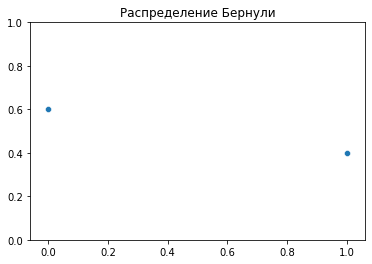

In [266]:
x = np.array([0, 1])
y = stats.bernoulli.pmf(x, p)
ax = sns.scatterplot(x=x, y=y)
ax.set_ylim(bottom=0, top=1)
ax.set_title(label="Распределение Бернули");

## Биномиальное распределение

**Биномиальное распределение**

Распределение количества "успехов" в поледовательности из $n$ независимых случайных экспериментов, таких, что вероятность "успеха" в каждом из них постоянна и равна $p$. Если СВ распределена биномиально, то записывают в виде:

$$
Y \sim Bin(n, p)
$$

Вероятность того, что СВ $Y$ примет значение $k$ (т.е. вероятность получить $k$ успехов в $n$ независимых случайных экспериментах), равна:

$$
P(Y = k) = 
\begin{pmatrix}
n \\
k
\end{pmatrix}
p^{k}q^{n-k}
$$

где 

- $q = 1 - p$ - вероятность неудачи

- $
\begin{pmatrix}
n \\
k
\end{pmatrix}
$ - биномиальный коэффициент - количество сочетаний из $n$ по $k$

**Математическое ожидание** 

$$
E \left[Y \sim Bin(n, p)\right] = np
$$

**Дисперсия**

$$
D \left[Y \sim Bin(n, p)\right] = npq
$$

**Функция распределения** (вероятность того, что $Y \leq y$) биномиального распределения:

$$
F(Y \leq y) = \sum_{k=0} ^{y}
\begin{pmatrix}
n \\
k
\end{pmatrix}
p^{k}q^{n-k}
$$

In [34]:
n = 10  # количество экспериментов (параметр распределения)
p = 0.4  # вероятность успеха в каждом эксперименте

# расчет первых 4-х моментов биномиального распределения с параметрами n и p:
mean, var, skew, kurt = stats.binom.stats(n, p, moments="mvsk")

print("Mean:\t\t{}".format(mean))  # среднее
print("Variance:\t{}".format(var)) # дисперсия
print("Skew:\t\t{}".format(skew))  # ассиметрия
print("Kurt:\t\t{}".format(kurt))  # куртозис

Mean:		4.0
Variance:	2.4
Skew:		0.12909944487358052
Kurt:		-0.1833333333333334


Построим функцию вероятности для следующих распределений:
- $Bin(20, 0.5)$
- $Bin(20, 0.75)$
- $Bin(40, 0.5)$

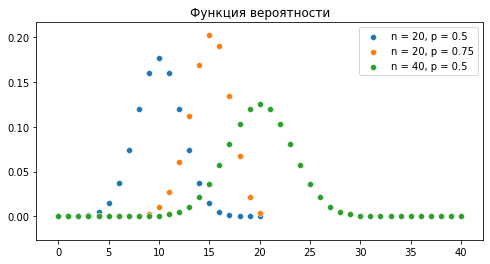

In [239]:
ns = [20, 20, 40]
ps = [0.5, 0.75, 0.5]

fig, ax = plt.subplots(figsize=(8, 4))
for n, p in zip(ns, ps):
    x = np.arange(n + 1)
    y = stats.binom.pmf(x, n, p)
    sns.scatterplot(x=x, y=y, ax=ax, label=f"n = {n}, p = {p}")
ax.set_title(label="Функция вероятности")
fig.show()

Для этих же распределений построим функцию распределения

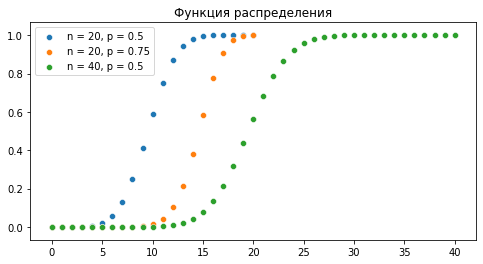

In [242]:
fig, ax = plt.subplots(figsize=(8, 4))
for n, p in zip(ns, ps):
    x = np.arange(n + 1)
    y = stats.binom.cdf(x, n, p)
    sns.scatterplot(x=x, y=y, ax=ax, label=f"n = {n}, p = {p}")
ax.set_title(label="Функция распределения")
fig.show()

Важно также отметить, что при больших значениях $n$ биномиальное распределение по закону больших чисел вырождается в нормальное.

# Непрерывные распределения

## Нормальное распределение (распределение Гаусса)

Функция плотности нормального распределения $N_{\mu, \sigma} (x)$ с параметрами $\mu$ и $\sigma$ описывается формулой:

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp{\left[\frac{(x - \mu)^2}{2\sigma^2}\right]}
$$

Если $\mu = 0$ и $\sigma = 1$, то такое распределение называется стандартным.

**Математическое ожидание**

$$
E \left[N_{\mu, \sigma} (x)\right] = \mu
$$

**Дисперсия**

$$
D \left[N_{\mu, \sigma} (x)\right] = \sigma ^2
$$

Сумма квадратов независимых случайных величин распределена по **хи-квадрат**, а отношение - по **Коши**.

Нормально распределение является **бесконечно делимым**, т.е. сумма нормально распределенных независимых СВ $x$ и $y$ с параметрами $\{\mu_x, \sigma_x\}$ и $\{\mu_y, \sigma_y\}$ соответственно также имеет нормальное распределение с параметрами $\{\mu_{x+y}, \sigma_{x+y}\}$. Причем:

$$
\mu_{x+y} = \mu_{x} + \mu_{y}
$$

$$
\sigma_{x+y}^2 = \sigma_{x}^2 + \sigma_{y}^2
$$

На свойстве бесконечной делимости основан **z-тест**. Этот тест используется для проверки равенства матожидания выборки нормально распределенных величин некоторому значению. Значение дисперсии должно быть изместным. Если значение дисперсии неизвестно и рассчитывается на основании анализируемой выборки, то применяется **t-тест**, основанный на распределении Стьюдента.

Построим **функцию плотности** нормальных распределений:
- $N(0, 0.2)$
- $N(0, 1)$ (стандартное распределение)
- $N(0, 5)$
- $N(-2, 0.5)$

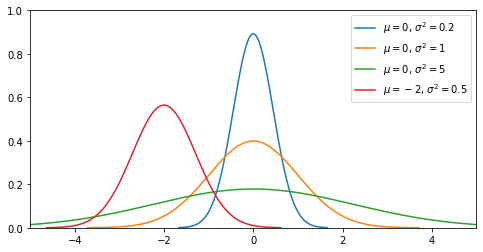

In [385]:
mus, variances = [0, 0, 0, -2], [0.2, 1, 5, 0.5]

fig, ax = plt.subplots(figsize=(8, 4))
for mu, variance in zip(mus, sigmas):
    sigma = variance**0.5
    # мы используем ppf по причине того, что в нормальном распределении СВ принимает значения [-inf, +inf]
    # и для того, чтобы выбрать промежуток отображения, мы используем ppf
    # т.е. по низу мы ограничиваем значением х, при котором вероятность P(X <= x) не превышает 0.0001
    # а по верху мы ограничиваем значением х, при котором вероятность P(X <= x) не превышает 0.9999
    x = np.arange(stats.norm.ppf(0.0001, loc=mu, scale=sigma), 
                  stats.norm.ppf(0.9999, loc=mu, scale=sigma), 0.01)
    y = stats.norm.pdf(x, loc=mu, scale=sigma)
    sns.lineplot(x=x, y=y, label="$\mu = {}$, $\sigma^2 = {}$".format(mu, variance), ax=ax)
ax.set_xlim(left=-5, right=5)
ax.set_ylim(bottom=0, top=1)
fig.show()

Также для этих распределений построим графики **функций распределения**.

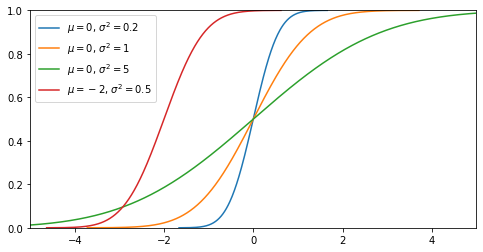

In [286]:
fig, ax = plt.subplots(figsize=(8, 4))
for mu, variance in zip(mus, sigmas):
    sigma = variance**0.5
    # мы используем ppf по причине того, что в нормальном распределении СВ принимает значения [-inf, +inf]
    # и для того, чтобы выбрать промежуток отображения, мы используем ppf
    # т.е. по низу мы ограничиваем значением х, при котором вероятность P(X <= x) не превышает 0.0001
    # а по верху мы ограничиваем значением х, при котором вероятность P(X <= x) не превышает 0.9999
    x = np.arange(stats.norm.ppf(0.0001, loc=mu, scale=sigma), 
                  stats.norm.ppf(0.9999, loc=mu, scale=sigma), 0.01)
    y = stats.norm.cdf(x, loc=mu, scale=sigma)
    sns.lineplot(x=x, y=y, label="$\mu = {}$, $\sigma^2 = {}$".format(mu, variance), ax=ax)
ax.set_xlim(left=-5, right=5)
ax.set_ylim(bottom=0, top=1)
fig.show()

Согласно центральной предельной теореме (ЦПТ), **сумма большого количества одинаково распределенных независимых случайных величин распределена нормально**. Собственно, как и арифметическое среднее, которое стремится к мат. ожиданию распределения, из которого пришли эти случайные величины.

Смоделируем это утверждение. Возьмем, в качестве распределения, из которого будем сэмплировать случайные величины, хи-квадрат с $k=3$ степенями свободы $\chi_3 ^{2}$. **Распределение хи-квадрат** с $k$ степенями свободы - распределение суммы квадратов $k$ независимых случайных величин, имеющих стандартное нормальное распределение. При этом, математическое ожидание $M \left[ \chi_k^2 \right] = k$.

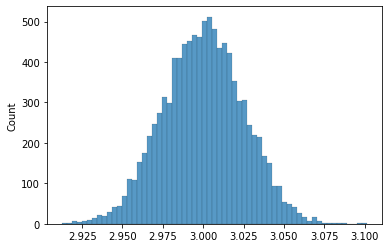

In [302]:
k = 3

means = list()
# сэплируем выборки и считаем средние арифметические этих выборок
for _ in range(10000):
    sample = stats.chi2.rvs(k, size=10000)
    means.append(sample.mean())
    
sns.histplot(means, lw=0.1);

Как и полагалось, средние арифметические распределены нормально, причем мат. ожидание этого распределения равно мат. ожиданию, из которого сэмплировались случайные величины.

## Распределение хи-квадрат с $k$ степенями свободы

Распределение $\chi_{k}^{2} \equiv \chi^{2} (k)$ с $k$ степенями свободы описывает сумму $k$ квадратов случайных величин $X_i$, каждая из которых распределена по нормальному стандартному распределению $N(0, 1)$.

Т.е. можно записать:

Пусть $z_{1} , \ldots , z_{k} $ - совместно независимые СВ, такие, что $z_{i} \sim N(0, 1)$. Тогда СВ $x = z_{1}^2 + \ldots + z_{k}^2 = \sum_{i=1}^{k} z_{i}^2 \sim \chi_{k}^{2}$

Смоделируем распределение $\chi^{2} (3)$

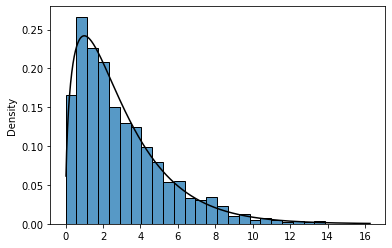

In [420]:
sample_size = 1000
x, y, z = stats.norm.rvs(loc=0, scale=1, size=sample_size), \
          stats.norm.rvs(loc=0, scale=1, size=sample_size), \
          stats.norm.rvs(loc=0, scale=1, size=sample_size)

chi = x**2 + y**2 + z**2

x = np.linspace(
    stats.chi2.ppf(0.001, 3),
    stats.chi2.ppf(0.999, 3), 1000
)
y = stats.chi2.pdf(x, 3)

ax = sns.histplot(chi, stat="density")
sns.lineplot(x=x, y=y, ax=ax, c="black");

Как мы видим, сумма квадратов трех псевдослучайных величин, сэмплированных из $N(0, 1)$, хорошо ложится на теоретическую функцию плотности распределения $\chi^{2} (3)$

**Мат. ожидание**

$$
M \left[ \chi^{2} (k) \right] = k
$$

**Дисперсия**

$$
D \left[ \chi^{2} (k) \right] = 2k
$$

**Функция плотности**

Распределение $\chi_{k}^{2}$ является частным случаем **гамма-распределения**, и его плотность имеет вид:

$$
f_{\chi_{k}^{2}}(x) \equiv \Gamma \left( \frac{k}{2}, 2 \right) = \frac{ \left( 1/2 \right)^{ \frac{k}{2}}}{\Gamma \left( \frac{k}{2} \right)} x^{\frac{k}{2} - 1} e^{ \left( - \frac{x}{2} \right) }
$$

где $Г$ - гамма-функция. Определение по Эйлеру гамма-функции (есть множество других определений, в том числе приближенных):

$$
\Gamma(z) = \int_{0}^{1} \left( - \ln x \right)^{z-1} dx
$$

Определение по Лежандру гамма-функции, если вещественная часть числа $z$ положительна (т.е. $z \in C$ - принадлежит множеству комплексных числел, причем $Re(z) > 0$ - вещественная часть числа $z$ положительна):

$$
\Gamma(z) = \int_{0}^{+ \infty} t^{z - 1} e^{-t} dt
$$

Попробуем отобразить гамма функцию по Эйлеру

In [316]:
def gamma(z: Union[int, float]):
    # расчет определенного интеграла
    area, error = integrate.quad(func=_gamma, a=0, b=1, args=(z))
    return area, error


def _gamma(x: Union[int, float], z: Union[int, float]):
    return np.power(-np.log(x), z - 1)

In [375]:
import warnings
warnings.filterwarnings("ignore")

zs = np.concatenate([
    np.linspace(-3, -2, 1000)[1:-1],
    np.linspace(-2, -1, 100)[1:-1],
    np.linspace(-1, 0, 100)[1:-1],
    np.linspace(0, 4, 100)[1:-1],
    ])
gamma_values = list()
for z in zs:
    gamma_values.append(gamma(z=z))
gamma_values = np.array(gamma_values)

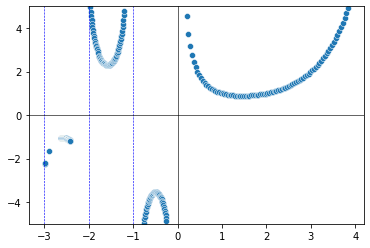

In [384]:
idx = ~((gamma_values > 5) | (gamma_values < -5))

fig, ax = plt.subplots()
sns.scatterplot(x=zs[idx], y=gamma_values[idx], ax=ax)

x_vlines = [-3, -2, -1]
for x_vline in x_vlines:
    ax.axvline(x_vline, lw=0.6, c="blue", ls="--")
ax.axvline(0, lw=0.6, c="black", ls="-")
ax.axhline(0, lw=0.6, c="black", ls="-")
ax.set_ylim(bottom=-5, top=5)
fig.show()

**Функция распределения**

$$
F_{\chi_{k}^{2}} (x) = \frac{\gamma \left( \frac{k}{2}, \frac{x}{2} \right)}{\Gamma \left( \frac{x}{2} \right) }
$$

Где $\Gamma$ и $\gamma$ - полная и неполная гамма-функции соответственно.

Построим **функцию плотности** для распределений:
- $\chi^{2} (1)$
- $\chi^{2} (2)$
- $\chi^{2} (3)$
- $\chi^{2} (4)$
- $\chi^{2} (5)$

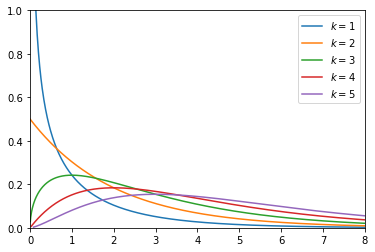

In [391]:
ks = [1, 2, 3, 4, 5]

fig, ax = plt.subplots(figsize=(6, 4))
for k in ks:
    # мы используем ppf по причине того, что в нормальном распределении СВ принимает значения [-inf, +inf]
    # и для того, чтобы выбрать промежуток отображения, мы используем ppf
    # т.е. по низу мы ограничиваем значением х, при котором вероятность P(X <= x) не превышает 0.0001
    # а по верху мы ограничиваем значением х, при котором вероятность P(X <= x) не превышает 0.9999
    x = np.arange(stats.chi2.ppf(0.0001, k), 
                  stats.chi2.ppf(0.9999, k), 0.01)
    y = stats.chi2.pdf(x, k)
    sns.lineplot(x=x, y=y, label="$k = {}$".format(k), ax=ax)
ax.set_xlim(left=0, right=8)
ax.set_ylim(bottom=0, top=1)
fig.show()

Также для этих распределений построим графики **функций распределения**.

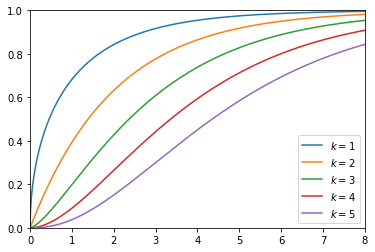

In [392]:
fig, ax = plt.subplots(figsize=(6, 4))
for k in ks:
    # мы используем ppf по причине того, что в нормальном распределении СВ принимает значения [-inf, +inf]
    # и для того, чтобы выбрать промежуток отображения, мы используем ppf
    # т.е. по низу мы ограничиваем значением х, при котором вероятность P(X <= x) не превышает 0.0001
    # а по верху мы ограничиваем значением х, при котором вероятность P(X <= x) не превышает 0.9999
    x = np.arange(stats.chi2.ppf(0.0001, k), 
                  stats.chi2.ppf(0.9999, k), 0.01)
    y = stats.chi2.cdf(x, k)
    sns.lineplot(x=x, y=y, label="$k = {}$".format(k), ax=ax)
ax.set_xlim(left=0, right=8)
ax.set_ylim(bottom=0, top=1)
fig.show()

Распределение $\chi^{2} (k)$ является **бесконечно делимым**. Т.е. если $x$ и $y$ - распределены по $\chi^{2} (k_1)$ и $\chi^{2} (k_2)$ соответственно, то их сумма $x + y \sim \chi^{2} (k_1 + k_2)$

На основании рапределения $\chi^{2} (k)$ основан **критерий согласия Пирсона**. С помощью этого критерия можно проверять достоверность принадлежности выборки СВ некоторому теоретическому распределению.